In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
tireTread1 = pd.read_csv('/workspaces/Projects/Imputation and Preprocessing/TireTread.csv')# Read TireTread.csv into a Pandas data frame called tireTread1
tireTread1.info() #display the structure of the dataframe
tireTread1.describe() #display summary statistics for the dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 456 entries, 0 to 455
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   TireID       456 non-null    int64  
 1   Position     456 non-null    object 
 2   UsageMonths  450 non-null    float64
 3   TreadDepth   456 non-null    float64
 4   Miles        456 non-null    int64  
dtypes: float64(2), int64(2), object(1)
memory usage: 17.9+ KB


,TireID,UsageMonths,TreadDepth,Miles
count,4.560000e+02,450.000000,456.000000,456.000000
mean,1.128225e+07,23.690444,7.640789,25395.484649
std,6.129054e+06,31.919611,2.505844,23593.604224
min,8.044100e+04,1.800000,0.000000,206.000000
25%,6.559652e+06,10.300000,6.400000,7299.000000
50%,1.126800e+07,17.200000,8.400000,19237.000000
75%,1.628981e+07,30.350000,9.500000,37419.000000
max,2.181757e+07,601.000000,16.700000,107237.000000


In [3]:
tireTreadDF2 = tireTread1
tireTreadDF2['tireTread2'] = tireTread1['UsageMonths'].fillna(tireTread1['UsageMonths'].mean()) #impute NA values as the mean

In [4]:
tireTreadDF2['TreadDepth'].quantile([0.25,0.5,0.75]) # Use the quantile function on the TreadDepth column

IQR = tireTreadDF2['TreadDepth'].quantile(0.75) - tireTreadDF2['TreadDepth'].quantile(0.25) # Calculate IQR

# Calculate the outlier min and max
outlierMin = tireTreadDF2['TreadDepth'].quantile(0.25) - (1.5 * IQR)
outlierMax = tireTreadDF2['TreadDepth'].quantile(0.75) + (1.5 * IQR)

print(outlierMin,outlierMax)# Display the outlier min and max


1.7500000000000009 14.149999999999999


In [5]:
# Normalize the UsageMonths column by taking the log of UsageMonths into a new column called LogUsageMonths and store the values in an additional column called normUsageMonths.
tireTreadDF2['LogUsageMonths'] = np.log(tireTreadDF2['UsageMonths'])

In [6]:
#Discretize TreadDepth into a new column named NeedsReplacing (tires with tread depth of less than or equal to 1.6mm need replacing). 
tireTreadDF2['NeedsReplacing'] = np.where(tireTreadDF2['TreadDepth'] <= 1.6, 'Yes', 'No')

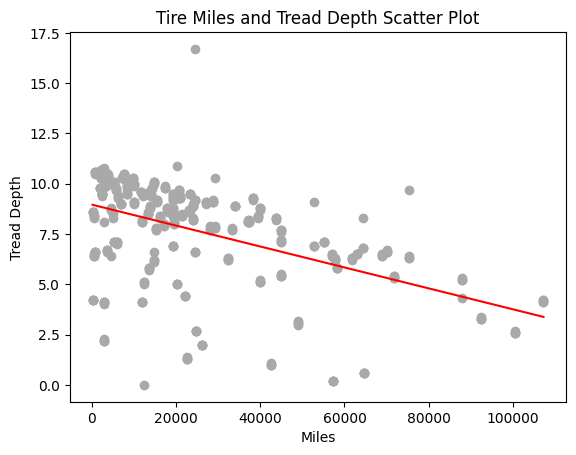

In [8]:
scatterPlot = plt.scatter(tireTreadDF2['Miles'], tireTreadDF2['TreadDepth'], color = 'darkgray')
#  Add a title to the scatter plot, "Tire Miles and Tread Depth Scatter Plot." 
plt.title('Tire Miles and Tread Depth Scatter Plot')
# Add a linear best fit line to the  plot and color it red.
plt.plot(np.unique(tireTreadDF2['Miles']), np.poly1d(np.polyfit(tireTreadDF2['Miles'], tireTreadDF2['TreadDepth'], 1))(np.unique(tireTreadDF2['Miles'])), color = 'red')
plt.xlabel('Miles')
plt.ylabel('Tread Depth')
plt.show()
